In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [96]:
x = np.arange(-10, 10.1, 0.1)
y = np.arange(-10, 10.1, 0.1)

X, Y = np.meshgrid(x, y)
Z = np.stack((X, Y), axis=-1).reshape(-1, 2)
df =pd.DataFrame(Z, columns=['x', 'y'])

In [18]:
# functions
def test(x):
    return sum(x)

def sphere(x):
    return sum([i**2 for i in x])

def griewangk(x):
    sum_part = sum([i**2 / 4000.0 for i in x])
    prod_part = np.prod(
        [np.cos(i / np.sqrt(idx + 1)) for idx, i in enumerate(x)]
    )
    return 1 + sum_part - prod_part

def FNS(x):
    return (sum(x)) ** 2

def subf(x):
    return np.tanh(np.sum(x)) ** 2

def SPS(x, k):
    sub_solutions = np.array_split(x, k)
    result = np.sum([subf(sub_sol) for sub_sol in sub_solutions])
    return result

In [99]:
def plot_lineplot(
    df: pd.DataFrame,
    min_y=None,
    max_y=None,
    title="title",
    xlabel="xlabel",
    ylabel="ylabel",
    label_prefix="",
    label_suffix="",
    legend=True,
    legend_title=None,
    legend_entry_limit=None,
    yline=None,
    xline=None,
):
    fig, ax = plt.subplots(1,1)
    fig.tight_layout()

    ax.plot(
        df,
        linestyle="-",
        linewidth=2,
    )
    if yline != None:
        ax.axhline(y=yline, color="black", linestyle="--")
    if xline != None:
        ax.axvline(x=xline, color="black", linestyle="--")
    if legend:
        ax.legend(
            [
                f"{label_prefix}{str(column).replace('_', ' ')}{label_suffix}"
                for column in df.columns[:legend_entry_limit]
            ],
            draggable=True,
            title=legend_title,
        )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(bottom=min_y, top=max_y)
    ax.grid()
    plt.show()

def plot_3d(df, result_column):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Extracting data for plotting
    x = df['x']
    y = df['y']
    z = df[result_column]

    # Creating the 3D plot
    ax.scatter(x, y, z)

    # Labeling axes
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis (Function value)')

    plt.show()

def plot_3d_surface(df, result_column):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    fig.tight_layout()

    # Extracting data for plotting
    x = df['x']
    y = df['y']
    z = df[result_column]

    # Creating the 3D plot
    ax.plot_trisurf(x, y, z, cmap='turbo', edgecolor='none')

    # Labeling axes
    # ax.set_xlabel('X axis')
    # ax.set_ylabel('Y axis')
    # ax.set_zlabel('Z axis (Function value)')
    ax.set_xticks([-10,0,10])
    ax.set_yticks([-10,0,10])
    # ax.set_zticks([0,100,200])
    # ax.axis('equal')
    ax.grid()
    plt.show()

In [100]:
df['sphere'] = df.apply(lambda x: sphere([x['x'], x['y']]), axis=1)
df['test'] = df.apply(lambda x: test([x['x'], x['y']]), axis=1)
df['griewangk'] = df.apply(lambda x: griewangk([x['x'], x['y']]), axis=1)
df['FNS'] = df.apply(lambda x: FNS([x['x'], x['y']]), axis=1)
df['SPS'] = df.apply(lambda x: SPS([x['x'], x['y']], 1), axis=1)

df.head()

,x,y,sphere,test,griewangk,FNS,SPS
0,-10.0,-10.0,200.00,-20.0,1.641837,400.00,1.0
1,-9.9,-10.0,198.01,-19.9,1.676692,396.01,1.0
2,-9.8,-10.0,196.04,-19.8,1.705284,392.04,1.0
3,-9.7,-10.0,194.09,-19.7,1.727325,388.09,1.0
4,-9.6,-10.0,192.16,-19.6,1.742588,384.16,1.0


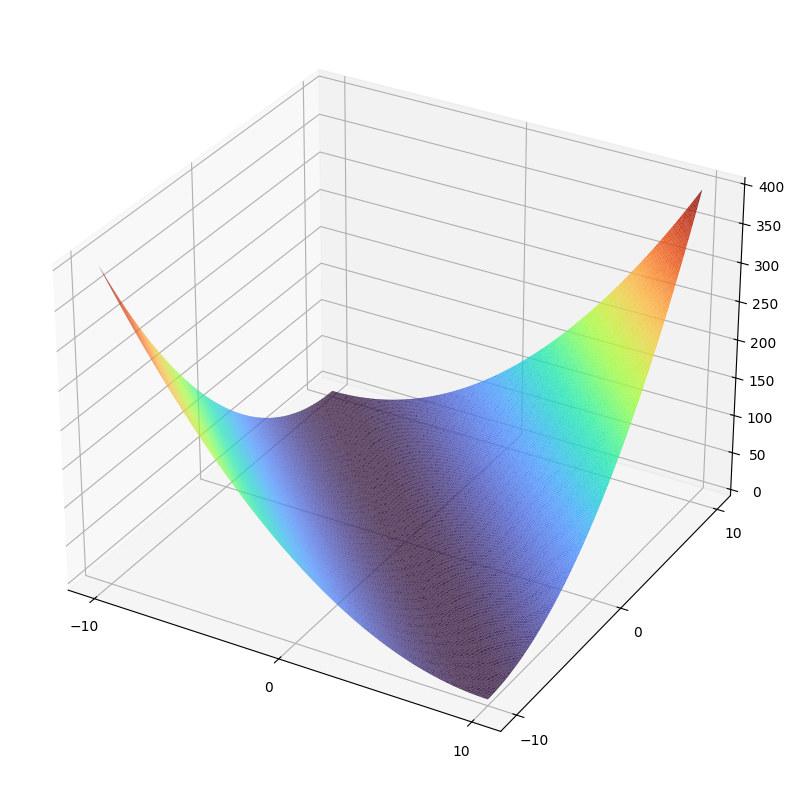

In [104]:
plot_3d_surface(df, 'FNS')